In [4]:
#train a phishing detection model using a neural network mlp classifier
#using the features extracted from the phishing urls


In [5]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#put the dataset_phishing.csv file in a pandas dataframe

df = pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [7]:
#checking the number of rows and columns and descriptive statistics
df.shape

(11430, 89)

In [8]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [10]:
#make the last row which is qualitative data(legitimate or phishing) into a quantitative data 0 and 1

df['status'] = df['status'].map({'legitimate':0, 'phishing':1})
df.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [11]:
corr_matrix = df.corr()

In [12]:
corr_matrix.shape

(88, 88)

In [13]:
corr_matrix 

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


In [14]:
corr_matrix['status']

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [15]:
status_corr = corr_matrix['status']

In [16]:
#function that select the features above a certain threshold for correlation, return df_feauters with correlation score

def select_features(df, threshold):
    corr_matrix = df.corr()
    corr_matrix = corr_matrix["status"]
    corr_matrix = corr_matrix[corr_matrix > threshold]
    df_selected_features = corr_matrix.drop("status")
    df_selected_features = pd.DataFrame(df_selected_features)
    return df_selected_features

    


In [17]:
df_features = select_features(df, 0.2)
df_features, df_features.shape

(                      status
 length_url          0.248580
 length_hostname     0.238322
 ip                  0.321698
 nb_dots             0.207029
 nb_qm               0.294319
 nb_eq               0.233386
 nb_slash            0.242270
 ratio_digits_url    0.356395
 ratio_digits_host   0.224335
 tld_in_subdomain    0.208884
 prefix_suffix       0.214681
 shortest_word_host  0.223084
 longest_words_raw   0.200147
 longest_word_path   0.212709
 phish_hints         0.335393
 empty_title         0.207043
 domain_in_title     0.342807
 google_index        0.731171,
 (18, 1))

In [18]:
#show the names of the selected features without the status collumn
#put that in a list
features_list = df_features.index.tolist()
features_list


['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'empty_title',
 'domain_in_title',
 'google_index']

In [19]:
X_selected = df[features_list]
X_selected

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,ratio_digits_url,ratio_digits_host,tld_in_subdomain,prefix_suffix,shortest_word_host,longest_words_raw,longest_word_path,phish_hints,empty_title,domain_in_title,google_index
0,37,19,0,3,0,0,3,0.000000,0.000000,0,0,3,11,6,0,0,0,1
1,77,23,1,1,0,0,5,0.220779,0.000000,0,0,19,32,32,0,0,1,1
2,126,50,1,4,1,3,5,0.150794,0.000000,1,1,3,17,17,0,0,1,1
3,18,11,0,2,0,0,2,0.000000,0.000000,0,0,5,5,0,0,0,1,0
4,55,15,0,2,0,0,5,0.000000,0.000000,0,0,3,11,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,4,0.000000,0.000000,0,0,3,11,11,0,0,0,0
11426,84,18,0,5,1,1,5,0.023810,0.000000,0,0,3,10,8,0,0,1,1
11427,105,16,1,2,1,1,5,0.142857,0.000000,0,0,3,15,15,0,0,0,1
11428,38,30,0,2,0,0,3,0.000000,0.000000,0,0,3,22,0,0,0,1,0


In [20]:
y = df['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [21]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=40, shuffle=True)


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 18), (2286, 18), (9144,), (2286,))

In [23]:
X_train


,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,ratio_digits_url,ratio_digits_host,tld_in_subdomain,prefix_suffix,shortest_word_host,longest_words_raw,longest_word_path,phish_hints,empty_title,domain_in_title,google_index
9025,48,11,0,3,0,0,6,0.083333,0.090909,0,1,2,7,7,0,0,0,0
9657,26,17,0,2,0,0,3,0.000000,0.000000,0,0,3,9,0,0,0,0,0
7476,69,20,0,2,0,0,6,0.000000,0.000000,0,1,3,15,15,1,0,1,1
4378,132,16,1,3,1,1,4,0.060606,0.000000,0,0,5,80,80,0,0,1,0
2009,44,21,0,2,0,0,5,0.022727,0.000000,0,0,3,13,11,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,45,34,1,4,0,0,3,0.177778,0.205882,0,0,2,9,3,0,0,1,1
5959,30,22,0,1,0,0,3,0.000000,0.000000,0,0,18,18,0,0,0,1,0
5426,33,25,0,2,0,0,3,0.000000,0.000000,0,0,3,17,0,0,0,1,0
7608,32,24,0,2,0,0,3,0.000000,0.000000,0,0,8,11,0,0,0,1,0


In [24]:
X_train
#save x_train as a pickle file

import pickle as pkl

pkl.dump(X_train, open('X_train.pkl', 'wb'))




In [25]:
#standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train
#save X_train as pickle file




array([[-0.24595425, -0.93946311, -0.42123642, ..., -0.3783423 ,
        -1.85790241, -1.06815289],
       [-0.65657133, -0.37935027, -0.42123642, ..., -0.3783423 ,
        -1.85790241, -1.06815289],
       [ 0.14599841, -0.09929385, -0.42123642, ..., -0.3783423 ,
         0.5382414 ,  0.93619557],
       ...,
       [-0.52592044,  0.36746686, -0.42123642, ..., -0.3783423 ,
         0.5382414 , -1.06815289],
       [-0.54458485,  0.27411472, -0.42123642, ..., -0.3783423 ,
         0.5382414 , -1.06815289],
       [-0.33927632,  1.39434041, -0.42123642, ..., -0.3783423 ,
         0.5382414 ,  0.93619557]])

In [26]:
X_train.shape

(9144, 18)

In [27]:
#do you need to create a neural network model for MLP classifier?

In [28]:
#train the dataset using a neural network mlp classifier

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'sgd', alpha =0.001, hidden_layer_sizes=(300,300,300,300), max_iter=1000, random_state=40, verbose=True)
mlp.fit(X_train, y_train)



Iteration 1, loss = 0.67492405
Iteration 2, loss = 0.60597950
Iteration 3, loss = 0.54412416
Iteration 4, loss = 0.48226374
Iteration 5, loss = 0.42328387
Iteration 6, loss = 0.37320798
Iteration 7, loss = 0.33618473
Iteration 8, loss = 0.31191748
Iteration 9, loss = 0.29611852
Iteration 10, loss = 0.28615435
Iteration 11, loss = 0.27917167
Iteration 12, loss = 0.27403463
Iteration 13, loss = 0.26983126
Iteration 14, loss = 0.26625064
Iteration 15, loss = 0.26309885
Iteration 16, loss = 0.26015563
Iteration 17, loss = 0.25735847
Iteration 18, loss = 0.25483215
Iteration 19, loss = 0.25246571
Iteration 20, loss = 0.25022719
Iteration 21, loss = 0.24803420
Iteration 22, loss = 0.24605884
Iteration 23, loss = 0.24408565
Iteration 24, loss = 0.24237695
Iteration 25, loss = 0.24055336
Iteration 26, loss = 0.23891578
Iteration 27, loss = 0.23724282
Iteration 28, loss = 0.23570993
Iteration 29, loss = 0.23430508
Iteration 30, loss = 0.23278510
Iteration 31, loss = 0.23144919
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(300, 300, 300, 300),
              max_iter=1000, random_state=40, solver='sgd', verbose=True)

In [29]:
#print the confusion matrix accuracy, precision, recall and f1 score for the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 score: ", f1_score(y_test, predictions))
    



[[1070   64]
 [  95 1057]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1134
           1       0.94      0.92      0.93      1152

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286

Accuracy:  0.9304461942257218
Precision:  0.9429081177520071
Recall:  0.9175347222222222
F1 score:  0.9300483941926969


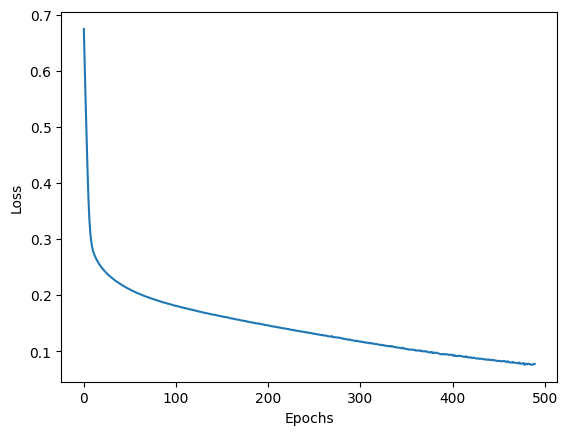

In [30]:
#plot the neural network model loss and accuracy

loss_values = mlp.loss_curve_
plt.plot(loss_values)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


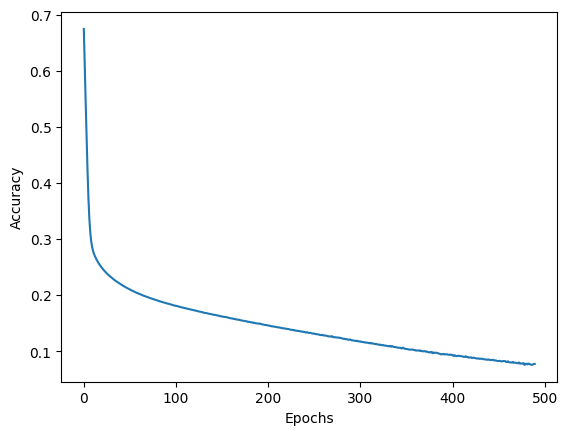

In [31]:
#plot the neural network model accuracy

plt.plot(mlp.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



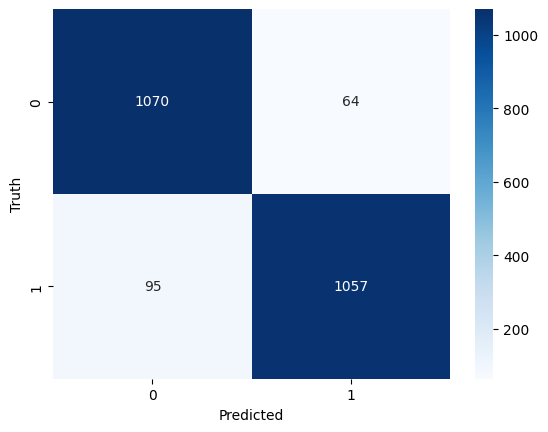

In [32]:
#plot the heat map of the confusion matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()





In [33]:
mlp

MLPClassifier(alpha=0.001, hidden_layer_sizes=(300, 300, 300, 300),
              max_iter=1000, random_state=40, solver='sgd', verbose=True)

In [34]:
#save the model

import pickle

with open('model_MLP.pkl', 'wb') as file:
    pickle.dump(mlp, file)

In [35]:
predictions

array([0, 1, 1, ..., 0, 0, 0])

In [36]:
df_features

,status
length_url,0.248580
length_hostname,0.238322
ip,0.321698
nb_dots,0.207029
nb_qm,0.294319
nb_eq,0.233386
nb_slash,0.242270
ratio_digits_url,0.356395
ratio_digits_host,0.224335
tld_in_subdomain,0.208884


In [37]:
features_list

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'empty_title',
 'domain_in_title',
 'google_index']

In [38]:
#what format should you input in the mlp to predict if it is phishing or not?
#answer: a list of features in the same order as the features_list
#does it have to have two columns one for feature name and one for numbers?
#answer:

In [39]:
features_list

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'empty_title',
 'domain_in_title',
 'google_index']

In [40]:
#function that extract the features on order of features_list from a url
import re
import requests
import tldextract
from bs4 import BeautifulSoup


def extract_features(url):

    #intialise feature list:
    features = []

    # Extract the domain name and path from the URL
    #domain name
    domain_name = re.findall(r'://([^/]+)', url)[0]
    path = re.findall(r'[^/]+(/.*)?', url)
    path = path[0] if path else ""

    #Length of the URL

    url_length = len(url)
    features.append(url_length)
    
    #Length of hostname

    hostname_length = len(domain_name)
    features.append(hostname_length)

    #Whether the hostname is an IP address

    if re.match(r'\d+\.\d+\.\d+\.\d+', domain_name):
        ip = 1
    else:
        ip = 0
    features.append(ip)

    #Number of dots in the URL

    dots = url.count('.')
    features.append(dots)

    #Number of question marks in the URL

    question_marks = url.count('?')
    features.append(question_marks)

    #Number of equals signs in the URL

    equals = url.count('=')
    features.append(equals)

    #Number of slashes in the URL

    slashes = url.count('/')
    features.append(slashes)

    #Ratio of digits to letters in the URL

    digits = sum(c.isdigit() for c in url)
    features.append(digits/len(url))

    #Ration of digits to letters in the hostname

    digits = sum(c.isdigit() for c in domain_name)
    features.append(digits/len(domain_name))

    #If the top level domain is in the subdomain

    tld = tldextract.extract(url).suffix
    subdomain = domain_name[:-len(tld) - 1]
    if tld in subdomain:
        tld_in_subdomain = 1
    else:
        tld_in_subdomain = 0
    features.append(tld_in_subdomain)

    #If hostname has a prefix or suffix

    if re.match(r'www\.|\.com$', domain_name):
        prefix = 1
    else:
        prefix = 0
    features.append(prefix)
    
    #lenght of the shortest word in the hostname

    shortest_word = min(len(word) for word in domain_name.split('.'))
    features.append(shortest_word)

    #lenght of the longest word in URL

    word_URL = re.findall(r'[a-zA-Z]+', url)
    length_word_URL = max(len(word) for word in word_URL)
    features.append(length_word_URL)

    #Lenght of the longest word in path

    word_path = re.findall(r'[a-zA-Z]+', path)
    if  word_path:
        length_word_path = max(len(word) for word in word_path)
    else:
        length_word_path = 0
    features.append(length_word_path)

    #if contains phishing hints

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        return {
            "success": False,
            "error": f"Cannot establish a connection to the website. Error: {e}"
        }
    soup = BeautifulSoup(response.text, 'html.parser')
    phishing_hints_list = ['phishing', 'login', 'account', 'signin', 'secure', 'confirm', 'verification', 'security', 'banking', 'bank', 'challenge', 'challeng','password','update','verify']
    phishing_hints = any(word in soup.text for word in phishing_hints_list)
    if phishing_hints:
        phishing_hints_true = 1
    else:
        phishing_hints_true = 0
    features.append(phishing_hints_true)

    #if there are empty title tags

    title = soup.find('title')
    if not title or not title.text.strip():
        empty_title_tag = 1
    else:
        empty_title_tag = 0
    features.append(empty_title_tag)

    #weathere thr domain name is in the title tag

    title = soup.find('title')
    if title and domain_name in title.text:
        domain_in_title = 1
    else:
        domain_in_title = 0
    features.append(domain_in_title)

    #if the url has a google index
   
    google_index = re.findall(r'google.com/search', url)
    if google_index:
        google_index_true = 1
    else:
        google_index_true = 0
    features.append(google_index_true)

    features = scaler.transform([features])
    features = features.tolist()
    
    return {
        "success": True,
        "features": features
    }

    



    


In [41]:



a = extract_features('https://pypi.org/project/beautifulsoup4/')
a["features"]

features_list = a["features"]
features_list

/Users/raresnitu/miniconda3/envs/security_env/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


[[-0.39526955455989204,
  -1.2195195372632,
  -0.4212364224705184,
  -1.0879931261826217,
  -0.3921619278051828,
  -0.2990717776109553,
  0.37540333917856195,
  -0.3184532517601368,
  -0.2676630588852993,
  -0.22936290961614966,
  -0.5078825618753186,
  -0.5133904912517215,
  -0.11007152910939884,
  0.10396444385391261,
  0.7991587583009617,
  -0.3783422958930282,
  -1.8579024094913514,
  -1.0681528902970168]]

In [42]:
#predecit if the url is phishing or not
predictions = mlp.predict(features_list)

if predictions == 1:
    print("Phishing")
else:
    print("Not Phishing")

Not Phishing


In [43]:
predictions

array([0])